In [1]:
%load_ext Cython
%matplotlib inline

In [2]:
import itertools as iter
import numpy as np
import time
import sys
import os
from tqdm import tqdm


def compare1(a1,a6_dict):
    for i in a1:
        if a6_dict.get(i) is not None:
            return True
    return False

def compare2(a1,a2,a6_dict):
    for i in a1:
        if a6_dict.get(i) is not None:
            for j in a2:
                if a6_dict.get(j) is not None:
                    return True
    return False


def make_winner_num_dict(winner_num):
    winner_num_dict = dict()
    for num in winner_num:
        winner_num_dict[num] = 1
        
    return winner_num_dict

def dict_init(overall_dict, number):
    for i in range(0,number):
        overall_dict[i] = 0

def analyse_zero(base_array, target_input, overall_dict):
    # len_array = len(target_input)
    num = 0
    for i in tqdm(target_input):
        # print(i)
        if i:
            if overall_dict.get(base_array[num]) is None:
                overall_dict[base_array[num]] = 1
            else:
                overall_dict[base_array[num]] += 1            
            base_array[num] = 0
        else:
            base_array[num] += 1
        num += 1
    
    overall_dict.pop(0,None)
#     print(base_array)
#     print(overall_dict)
        

In [3]:
%%cython
cimport cython
# @cython.boundscheck(False) 
# @cython.wraparound(False)
# @cython.nonecheck(False)
cimport numpy as np
ctypedef np.long DTYPE_t
def compare3(a1, a2, a6_dict):
    cdef dict a6_cython = a6_dict
    cdef tuple a1_cython = a1
    cdef tuple a2_cython = a2

    for i in a1_cython:
        if a6_cython.get(i) is not None:
            for j in a2_cython:
                if a6_cython.get(j) is not None:
                    return True
# def compare2(a1,a2,a6_dict):
#     for i in a1:
#         if a6_dict.get(i) is not None:
#             for j in a2:
#                 if a6_dict.get(j) is not None:
#                     return True
#     return False

# %%cython
# def sum_list(a):
#     cdef list cast_list = <list?>a
#     cdef int s = 0
#     cdef int i 
#     for i in cast_list:
#         s += i
#     return s




In [4]:
%%cython
cimport cython
def analyse_zero2(base_array, target_input, overall_dict):
    # len_array = len(target_input)
    cdef int num = 0
    cdef list base_array_c = base_array
    cdef list target_input_c = target_input
    cdef dict overall_dict_c = overall_dict
    cdef int i
    for i in target_input_c:
        # print(i)
        if i:
            if overall_dict_c.get(base_array_c[num]) is None:
                overall_dict_c[base_array_c[num]] = 1
            else:
                overall_dict_c[base_array_c[num]] += 1            
            base_array_c[num] = 0
        else:
            base_array_c[num] += 1
        num += 1
    
    overall_dict_c.pop(0,None)

In [5]:
%%cython
cimport cython
cimport numpy as np
def analyse_zero3(np.ndarray [long, ndim=1] base_array_c,np.ndarray [long, ndim=1] target_input_c,np.ndarray [long, ndim=1] overall_dict_c):
    # len_array = len(target_input)
    cdef int num = 0
#     cdef list base_array_c = base_array
#     cdef list target_input_c = target_input
#     cdef dict overall_dict_c = overall_dict
    cdef int i
    cdef np.ndarray [long, ndim=1] dd
#     dd = (target_input_c + base_array_c) * target_input_c
    
#     for i in dd:
#         if overall_dict_c.get(base_array_c[num]) is None:
#             overall_dict_c[base_array_c[num]] = 1
#         else:
#             overall_dict_c[base_array_c[num]] += 1            
#     num += 1           
    
    
    for i in target_input_c:
        # print(i)
        if i == 1:
#             if overall_dict_c.get(base_array_c[num]) is None:
#                 overall_dict_c[base_array_c[num]] = 1
#             else:
            overall_dict_c[base_array_c[num]] += 1            
            base_array_c[num] = 0
        else:
            base_array_c[num] += 1
        num += 1
    
    overall_dict_c[0] = 0

In [6]:


def make_winner_dict_list(winner_number):
    winner_num_dict = []
    for ii in winner_number:
        winner_num_dict.append(make_winner_num_dict(ii))
    
    return winner_num_dict

def make_numpy_file(winner_number_dict, start_name, odd, even):
    com_num = len(odd)*len(even)
    if os.path.isdir('data') == False:
        print('無法存取data資料夾，重新建立data資料夾')
        try:
            os.mkdir('data')
        except:
            print('[錯誤2] 建立data資料夾有誤')
            sys.exit(0)
    # calculate every combination

    for ii in (range(0, len(winner_number_dict))):
        file_name = str(ii+int(start_name)) + '.data'
#         print('計算檔案: ' + file_name + ' 中...')
        # combination_data = np.array([False]*com_num,np.bool)
        combination_data = [False] * com_num
        flag = 0
        for i in tqdm(odd):
            for j in even:
                combination_data[flag] = compare2(i, j, winner_number_dict[ii])
                flag += 1            
#         print('製作檔案 ' + file_name + '中.....')
        try:
            f = open(os.path.join('data',file_name),'wb')
            combination_data_np = np.array(combination_data)
#             print(combination_data)
            np.save(f,combination_data_np)            
#             print('存檔，檔名為: ' + file_name + '，存檔成功')  
        except:
            print('[錯誤3] 存檔錯誤，跳過本檔案，請重新操作')
            sys.exit(0)
        
def get_winner_number_from_file(file_name):
    try:
        f2 = open(file_name, 'r')
        tmp = f2.read().split('\n')
        tmp = tmp[:len(tmp)-1]
        winner_number = [[int(j) for j in (i.split(','))] for i in tmp] 
    except:
        print('[錯誤1] 操作異常，輸入檔名或是檔案有誤!')
        print('請重新操作')
        sys.exit(0)
    return winner_number

def get_winner_number_from_input():
    try:
        winner_str = input("請輸入開獎號碼:")
        winner_number_split_str = winner_str.split(',')
        winner_number = [[int(j) for j in winner_number_split_str]]
    except:
        print('[錯誤4] 輸入開獎號碼有誤，無法分析')
        print('請重新操作')
        sys.exit(0)
    return winner_number
    

def mode_1():
#     odd = list(iter.combinations(range(1,50,2),4))
#     even = list(iter.combinations(range(2,49,2),4))
    odd = list(iter.combinations(range(1,11,2),4))
    even = list(iter.combinations(range(2,10,2),4))        
    input_file_name = input('請輸入包含正確格式的開獎號碼檔案名稱: ')
    print('開啟檔案 ' + input_file_name + " ......")
    winner_number = get_winner_number_from_file(input_file_name)
    print('開啟檔案 ' + input_file_name + " 成功......")
    start_name = input('請輸入檔案第一期的期數: ')
    winner_number_dict_list = make_winner_dict_list(winner_number)

    # making combination test of odd and even
    time0 = time.clock()
    make_numpy_file(winner_number_dict_list, start_name, odd, even)
    time2 = time.clock() - time0
    print('本次計算時間: ' + str(time2) + ' 秒')

def mode_2():
    odd = list(iter.combinations(range(1,11,2),4))
    even = list(iter.combinations(range(2,10,2),4))   
#     odd = list(iter.combinations(range(1,50,2),4))
#     even = list(iter.combinations(range(2,49,2),4))
    winner_number = get_winner_number_from_input()
    winner_number_dict_list = make_winner_dict_list(winner_number)
    start_name = input('請輸入本次輸入的期數: ')
    time0 = time.clock()
    make_numpy_file(winner_number_dict_list, start_name, odd, even)
    time2 = time.clock() - time0
    print('本次計算時間: ' + str(time2) + ' 秒')

In [7]:
mode = input("請輸入計算模式(1/2): ")
if mode == '1':
    mode_1()
elif mode == '2':
    mode_2()
else:
    print("輸入錯誤，請重新執行程式！")

請輸入計算模式(1/2): 1
請輸入包含正確格式的開獎號碼檔案名稱: test.txt
開啟檔案 test.txt ......
開啟檔案 test.txt 成功......
請輸入檔案第一期的期數: 1


100%|██████████| 5/5 [00:00<00:00, 65741.44it/s]

本次計算時間: 0.031811000000000034 秒


In [8]:
	print('初始化...')
	odd = list(iter.combinations(range(1,11,2),4))
	even = list(iter.combinations(range(2,10,2),4))
	com_num = int(len(odd)*len(even))  
	base_array = np.array([0]*com_num)
	overall_dict = np.array([0]*com_num)
	np.savez_compressed(os.path.join('./','base_array_{}'.format(str(0))), data=base_array)
	np.savez_compressed(os.path.join('./','overall_dict_{}'.format(str(0))), data=overall_dict )
	print('初始化完成')
	input('任意鍵結束')

初始化...
初始化完成
任意鍵結束


''

In [10]:
import pickle
load_file_name_first = int(input('請輸入要進行第二階段分析的開始檔案: '))
load_file_name_last = int(input('請輸入要進行第二階段分析的最後檔案: '))

odd = list(iter.combinations(range(1,11,2),4))
even = list(iter.combinations(range(2,10,2),4))

# odd = list(iter.combinations(range(1,10,2),4))
# even = list(iter.combinations(range(2,10,2),4))
t1 = time.clock()
com_num = int(len(odd)*len(even))
print(str(time.clock()-t1))
t1 = time.clock()
ba_npz_tmp = np.load('base_array_{}.npz'.format(str(load_file_name_first-1)))
base_array = ba_npz_tmp['data']
# base_array = np.array([0] * com_num, dtype=np.int)
# base_array = [int(0)] * com_num
# dict for continuous number
# overall_dict = np.array([0] * 50000, np.int16)
# overall_dict = dict()
# overall_longest_num = 20000
# overall_dict = np.array([0] * overall_longest_num, dtype=np.int)

od_npz_tmp = np.load('overall_dict_{}.npz'.format(str(load_file_name_first-1)))
overall_dict = od_npz_tmp['data']



# dict initialization
# dict_init(overall_dict,10000)

end_array = np.array([True]*com_num, dtype=np.int)

# make a output file
# f_write = open(str(load_file_name_first) + "_" + str(load_file_name_last) + ".analyse" )
print(str(time.clock() - t1))
t1 = time.clock()
start_time = time.clock()

for ii in range(load_file_name_first,load_file_name_last+1):
    print(ii)
#     print("Analyzing file: " + str(ii) + ".data...")
    f_read = open(os.path.join('data',str(ii)) + ".data", "rb")
    target_input = (np.load(f_read).astype(np.bool).astype(np.int))
    
    
    analyse_zero3(base_array, target_input, overall_dict)
    print(str(ii)+'.data')
    print(base_array)
    np.savez_compressed('base_array_{}'.format(str(ii)), data=base_array)
    np.savez_compressed('overall_dict_{}'.format(str(ii)), data=overall_dict )
#     od = open('overall_dict_{}.pkl'.format(str(ii)), 'wb')
#     pickle.dump(overall_dict,od)
#     od.close()
    print(overall_dict[0:9])
#     print(overall_dict[1:10])
    f_read.close()

last_win_info = base_array.copy()
analyse_zero3(base_array, end_array, overall_dict)
# print(base_array)
# print(overall_dict)
overall_time = time.clock() - start_time

print("The time elpased = " + str(overall_time) + " seconds" )
# f_save_chart = open(str(load_file_name_first) + "_" + str(load_file_name_last) + ".analyse",'wb')
# np.save(f_save_chart, overall_dict)
# f_last_save = open(str(load_file_name_first) + "_" + str(load_file_name_last) + "last_only2.analyse",'wb' )
# np.save(f_last_save,np.array(base_array,np.int16) - np.array(last_win_info,np.int16))
print("Save file OK")

請輸入要進行第二階段分析的開始檔案: 1
請輸入要進行第二階段分析的最後檔案: 9
0.0003660000000000885
0.007728999999999875
1
1.data
[0 0 0 0 0]
[0 0 0 0 0]
2
2.data
[0 0 0 0 0]
[0 0 0 0 0]
3
3.data
[0 0 0 0 0]
[0 0 0 0 0]
4
4.data
[1 1 1 1 1]
[0 0 0 0 0]
5
5.data
[2 2 2 2 2]
[0 0 0 0 0]
6
6.data
[0 0 0 3 0]
[0 0 4 0 0]
7
7.data
[1 0 0 0 0]
[0 0 4 1 0]
8
8.data
[0 1 0 0 0]
[0 1 4 1 0]
9
9.data
[0 0 0 1 0]
[0 2 4 1 0]
The time elpased = 0.04111100000000012 seconds
Save file OK


In [37]:
odd = list(iter.combinations(range(1,11,2),4))
even = list(iter.combinations(range(2,10,2),4))
com_num = len(odd) * len(even)
base_array = np.array([0] * com_num, dtype=np.int)
# base_array = [int(0)] * com_num
# dict for continuous number
# overall_dict = np.array([0] * 50000, np.int16)
# overall_dict = dict()
overall_longest_num = 20000
overall_dict = np.array([0] * overall_longest_num, dtype=np.int)

np.savez_compressed('base_array_{}'.format(0), data=base_array)
np.savez_compressed('overall_dict_{}'.format(0), data=overall_dict )


In [39]:
bb = np.load('base_array_9.npz')



AttributeError: 'NpzFile' object has no attribute 'shape'

In [40]:
np.savez_compressed('npz.npz', bb=bb)
    

In [40]:
a = np.load('base_array_9.npz')
b = a['data']

In [41]:
b


array([0, 0, 0, 1, 0])

In [41]:
cc = np.load('npz.npz')
dd = cc['bb']

(array([ 83099978.,  21048423.,  11158238.,   7667999.,   4135902.,
          2403675.,   1859142.,    932867.,    533607.,   1579069.]),
 array([  0.,   5.,  10.,  15.,  20.,  25.,  30.,  35.,  40.,  45.,  50.]),
 <a list of 10 Patch objects>)

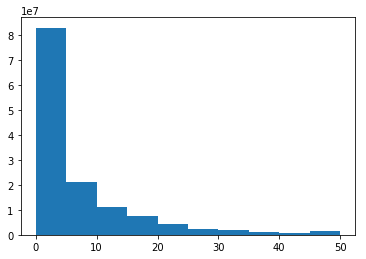

In [57]:
plt.hist(dd)

In [43]:
tt = np.load('./data/39.data')

In [44]:
np.savez_compressed('testnpz.data', data=tt)

In [23]:
import h5py
f = h5py.File('HDF5_FILE.h5','w')
f['data'] = bb


In [24]:
f.close()

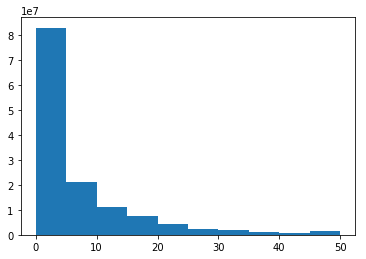

In [12]:
from matplotlib import pyplot as plt
plt.hist(bb[1:])
plt.show()

In [ ]:
make_winner_dict_list(winner_number)

In [ ]:
s = '1,2,3,4,5,6'

s.split(',')


In [ ]:
type(target_input)

In [10]:
int(True)

1

In [23]:
type(target_input)

list

In [15]:
f_read = open(os.path.join('data',str(1)) + ".data", "rb")

In [16]:
tt = np.load(f_read)

In [17]:
tt


array([None, None, None, ..., None, None, None], dtype=object)

In [18]:
tt[2:50]

array([None, True, True, None, None, True, None, None, True, None, None,
       None, None, None, None, None, None, None, None, None, None, True,
       True, None, None, True, None, None, True, None, None, None, None,
       None, None, None, None, None, None, None, True, True, None, None,
       True, None, None, True], dtype=object)

In [20]:
tt.astype(np.bool)

array([False, False, False, ..., False, False, False], dtype=bool)

In [11]:
%%cython
cimport cython
cimport numpy as np
ctypedef np.long DTYPE_t


def analyze_second(ii, jj, npz_data, data, num):
    cdef tuple ii_c = ii
    cdef tuple jj_c = jj
    cdef list npz_data_c = npz_data
    cdef list data_c = data
    
    cdef int num_c = num 
    
    cdef int i = 0
    cdef int j = 0
    
    for i in ii_c:
        data_c[i-1] += npz_data_c[num_c]
    for j in jj_c:
        data_c[j-1] += npz_data_c[num_c]
    data = data_c
    
    
    

In [1]:
from matplotlib import pyplot as plt
import itertools as iter
import numpy as np
import time
import sys
import os
from tqdm import tqdm


data = list(np.array([0]*49, dtype=np.int8))
num2analyze = input('請輸入您想要分析第幾期的資料: ')
try:
    print('讀取資料中...')
    npz_data = list(np.load(os.path.join('./','base_array_{}.npz'.format(str(num2analyze))))['data'])

    odd = (list(iter.combinations(range(1,11,2),4)))
    even = (list(iter.combinations(range(2,10,2),4)))

    num = 0
    for ii in tqdm(odd):
        for jj in even:
            analyze_second(ii,jj,npz_data, data,num)
    #         for i in ii:
    #             data[i-1] += npz_data[num]
    #         for j in jj:
    #             data[j-1] += npz_data[num]
            num += 1
    plt.bar(np.arange(1,50), data)
except:
    print('操作錯誤，請檢察是否有正確npz檔案在second_stage_data資料夾中')
        
        
        

請輸入您想要分析第幾期的資料: 9


  0%|          | 0/5 [00:00<?, ?it/s]

讀取資料中...
操作錯誤，請檢察是否有正確npz檔案在second_stage_data資料夾中


In [79]:
len(data)

49

In [76]:
from matplotlib import pyplot as plt


<Container object of 15 artists>

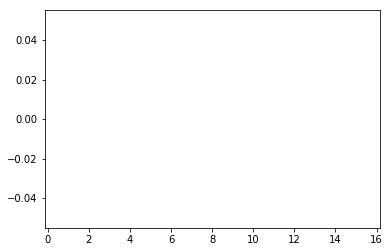

In [13]:
plt.bar(np.arange(1,16),np.array(data)[0:15])


In [8]:
a=np.load(os.path.join('second_stage_data','base_array_9.npz'))['data']

In [10]:
np.min(a)

0

In [17]:
a[3000:4000]

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,